<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/Skenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [5]:
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/data%20fix.csv' 
dataframe = pd.read_csv(URL)
dataframe

,Period,TE,HU,RF,WS,PD,ABJ,LAG 0,LAG 1,LAG 2,LAG 3,LAG 4,LAG 5,LAG 6,LAG 7,LAG 8,LAG 9,LAG 10,LAG 11,LAG 12,OS
0,Jan-10,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,Feb-10,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,Mar-10,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,Apr-10,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,May-10,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Aug-18,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,Sep-18,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,Oct-18,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,Nov-18,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [23]:
#mengambil kolom period, rf, dan os serta mengacak dataset
data = dataframe[[ 'LAG 0', 'LAG 1', 'LAG 2', 'LAG 3', 'LAG 4', 'LAG 5', 'LAG 6', 'LAG 7', 'LAG 8', 'LAG 9', 'LAG 10', 'LAG 11', 'LAG 12', 'OS' ]]
data = shuffle(data)
data.head()

,LAG 0,LAG 1,LAG 2,LAG 3,LAG 4,LAG 5,LAG 6,LAG 7,LAG 8,LAG 9,LAG 10,LAG 11,LAG 12,OS
86,1,1,5,3,3,2,1,1,2,2,6,2,2,0
65,0,0,0,0,0,0,0,0,0,0,0,5,0,0
85,1,5,3,3,2,1,1,2,2,6,2,2,2,0
66,5,0,0,0,0,0,0,0,0,0,0,0,5,1
14,1,3,1,0,0,0,0,0,0,0,0,1,0,0


In [24]:
#train-test split 80-20
train, test = train_test_split(data, test_size=0.2)
print(len(train), 'banyak data train')
print(len(test), 'banyak data test')

#train-test split 70-30
#train, test = train_test_split(data, test_size=0.3)
#print(len(train), 'banyak data train')
#print(len(test), 'banyak data test')

86 banyak data train
22 banyak data test


In [25]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(data, batch_size=32):
  data = data.copy()
  labels = data.pop('OS')
  ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
  ds = ds.batch(batch_size)
  return ds

In [26]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

In [27]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('LAG 0:', feature_batch['LAG 0'])
  print('OS:', label_batch)

Every feature: ['LAG 0', 'LAG 1', 'LAG 2', 'LAG 3', 'LAG 4', 'LAG 5', 'LAG 6', 'LAG 7', 'LAG 8', 'LAG 9', 'LAG 10', 'LAG 11', 'LAG 12']
LAG 0: tf.Tensor([1 6 3 0 4], shape=(5,), dtype=int64)
OS: tf.Tensor([0 1 1 0 1], shape=(5,), dtype=int64)


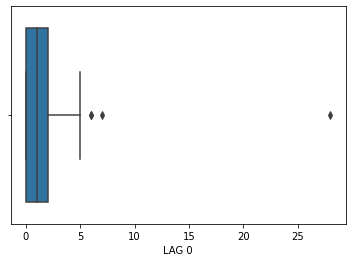

In [33]:
import seaborn as sns
sns.boxplot(x=data['LAG 0'])

In [34]:
feature_columns = []

for header in ['LAG 0', 'LAG 1', 'LAG 2', 'LAG 3', 'LAG 4', 'LAG 5', 'LAG 6', 'LAG 7', 'LAG 8', 'LAG 9', 'LAG 10', 'LAG 11', 'LAG 12']:
  feature_columns.append(feature_column.numeric_column(header))

In [35]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer

In [36]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

In [37]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=test_ds,
          epochs=25)

Epoch 1/25
Consider rewriting this model with the Functional API.


ValueError: ignored